In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")

In [24]:
path = '../Data/df2.csv'

In [25]:
df1 = pd.read_csv(path,  parse_dates=['Date'])
df1 = df1.rename(columns = {"Date":"ds","Close":"y"}) 
df1

,ds,Open,High,Low,y,tby,ffr,fta,eps,div,une,wti,ppi,rfs
0,2003-01-02,909.03,909.03,879.82,909.03,4.07,1.24,732202.0,40.40,1.79,5.8,31.97,135.3,295248.0
1,2003-01-03,908.59,910.99,903.23,908.59,4.05,1.24,732202.0,40.40,1.79,5.8,33.26,135.3,295248.0
2,2003-01-06,929.01,931.70,908.59,929.01,4.09,1.24,732202.0,40.40,1.79,5.8,32.29,135.3,295248.0
3,2003-01-07,922.93,930.65,919.98,922.93,4.04,1.24,732202.0,40.40,1.79,5.8,31.20,135.3,295248.0
4,2003-01-08,909.93,922.93,908.35,909.93,4.00,1.24,724902.0,40.40,1.79,5.8,30.66,135.3,295248.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,2021-01-25,3851.68,3859.23,3797.16,3855.36,1.05,0.09,7414942.0,95.72,1.58,6.3,52.78,204.3,576466.0
4516,2021-01-26,3862.96,3870.90,3847.78,3849.62,1.05,0.09,7414942.0,95.72,1.58,6.3,52.61,204.3,576466.0
4517,2021-01-27,3836.83,3836.83,3732.48,3750.77,1.04,0.09,7404926.0,95.72,1.58,6.3,52.81,204.3,576466.0
4518,2021-01-28,3755.75,3830.50,3755.75,3787.38,1.07,0.09,7404926.0,95.72,1.58,6.3,52.26,204.3,576466.0


In [26]:
import datetime as datetime
# use data before covid time
ctf_date = datetime.datetime(2020, 3, 1)
df = df1.loc[df1.ds < ctf_date , ].copy()
df

,ds,Open,High,Low,y,tby,ffr,fta,eps,div,une,wti,ppi,rfs
0,2003-01-02,909.03,909.03,879.82,909.03,4.07,1.24,732202.0,40.40,1.79,5.8,31.97,135.3,295248.0
1,2003-01-03,908.59,910.99,903.23,908.59,4.05,1.24,732202.0,40.40,1.79,5.8,33.26,135.3,295248.0
2,2003-01-06,929.01,931.70,908.59,929.01,4.09,1.24,732202.0,40.40,1.79,5.8,32.29,135.3,295248.0
3,2003-01-07,922.93,930.65,919.98,922.93,4.04,1.24,732202.0,40.40,1.79,5.8,31.20,135.3,295248.0
4,2003-01-08,909.93,922.93,908.35,909.93,4.00,1.24,724902.0,40.40,1.79,5.8,30.66,135.3,295248.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,2020-02-24,3257.61,3259.81,3214.65,3225.89,1.38,1.58,4171570.0,135.28,1.79,3.5,51.36,196.7,525810.0
4286,2020-02-25,3238.94,3246.99,3118.77,3128.21,1.33,1.58,4171570.0,135.28,1.79,3.5,49.78,196.7,525810.0
4287,2020-02-26,3139.90,3182.51,3108.99,3116.39,1.33,1.58,4158637.0,135.28,1.79,3.5,48.67,196.7,525810.0
4288,2020-02-27,3062.54,3097.07,2977.39,2978.76,1.30,1.58,4158637.0,135.28,1.79,3.5,47.17,196.7,525810.0


In [27]:
# test data: predict 1 year (~252 trading days)
pred_periods = 252

# cutoff between test and train data
cutoff = len(df) - 252

df_train = df[:cutoff].copy()
df_test = df[cutoff:].copy()
print(cutoff)

4038


In [20]:
# Random Forest Model
my_rfg = RFG(n_estimators = 200, random_state =820)

# fit close price using random forest model
my_rfg.fit(df_train[['Open','High','Low']].copy(),df_train.y.copy())
y_pred = my_rfg.predict(df_test[['Open','High','Low']])


In [9]:
# Naive Arima Model
from pmdarima.arima import auto_arima
model = auto_arima(df_train.y, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)

# fit close price using arima model
model.fit(df_train.y)
arima_forecast = model.predict(n_periods=pred_periods)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=8.46 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=36521.189, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=35300.639, Time=1.51 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.78 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=36498.005, Time=0.23 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=34774.267, Time=3.06 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=8.99 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.64 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=34790.359, Time=2.65 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=34774.247, Time=3.23 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=35297.847, Time=2.35 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=22.29 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=7.13 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=34776.182, Time=6.47 sec
 ARIMA(2,1,1)(2,1,0)[12]             : A

In [10]:
# FB Prophet model 
from fbprophet import Prophet
fbp = Prophet(daily_seasonality=True)

# fit close price using fbprophet model
fbp.fit(df_train[['ds','y']])
    
 # predict pred_size futures and get the forecast price 
fut = fbp.make_future_dataframe(periods = pred_periods, freq='D')
fb_forecast = fbp.predict(fut) 

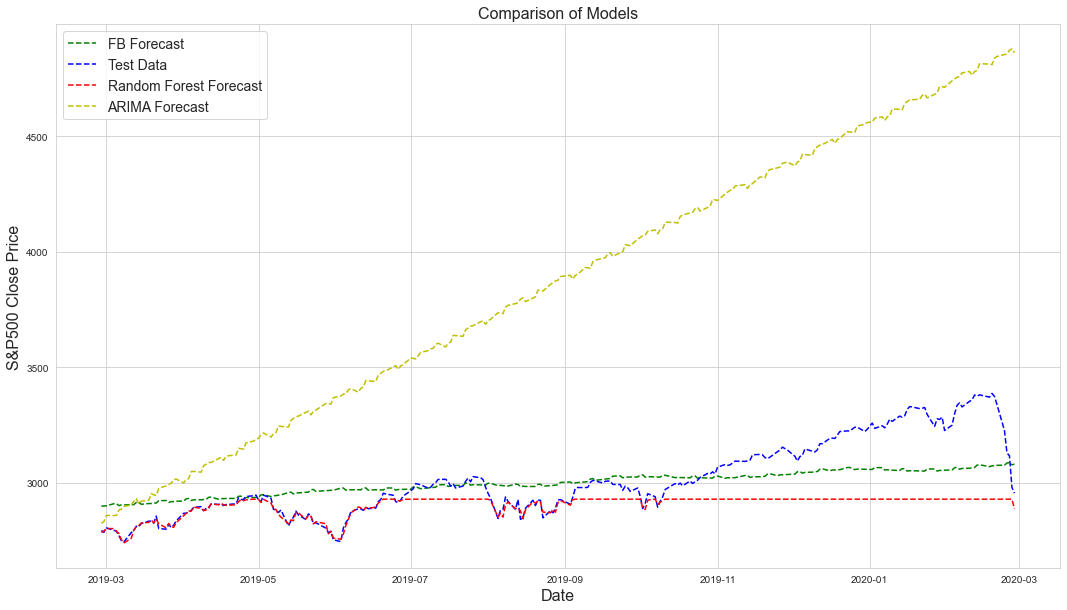

In [28]:
plt.figure(figsize=(18,10))

# # plot the forecast
plt.plot(df_test.ds, fb_forecast[cutoff:].yhat,'g--', label = "FB Forecast")

plt.plot(df_test.ds, df_test.y,'b--', label = "Test Data")

plt.plot(df_test.ds , y_pred,'r--',label="Random Forest Forecast")

plt.plot(df_test.ds , arima_forecast,'y--',label="ARIMA Forecast")


# plt.plot(df_test.ds ,df.y,'r-o',label="test result")
plt.title('Comparison of Models', fontsize=16)
plt.legend(fontsize=14)

plt.xlabel("Date", fontsize=16)
plt.ylabel("S&P500 Close Price", fontsize=16)

plt.show()

In [158]:
from sklearn.metrics import mean_squared_error as MSE

rf_mse_test = MSE(df_test.y, y_pred[cutoff:]) # mse for random forest model and sp500 close price
arima_mse_test = MSE(df_test.y,arima_forecast ) # mse for naive arima model and sp500 close price
fb_mse_test = MSE(df_test.y, fb_forecast[cutoff:].yhat)  # mse for FB prophet model and sp500 close price

print(rf_mse_test,arima_mse_test,fb_mse_test )

29736.970587013886 927591.9132446209 15247.912341091069
